# Initial Data Analysis 

Author: Emily
Date: 19/09/2022

The goal of this process notebook is to take a look at the dataset of participant 1 in Jupyter and perform initial tests on the data to see if it is clean data.

## Import Dataset

By first importing the required modules pandas then importing the csv.

In [1]:
# modules needed for notebook to run

import pandas as pd

In [2]:
url = "https://raw.github.sydney.edu.au/zlin4387/2022-DATA3406-CC03-Group03/main/datasets/Participant-01.csv?token=GHSAT0AAAAAAAAAHIYTZ53NQWBCTDKIISGQYZ4HXWQ"
df = pd.read_csv(url)

In [3]:
df

,Start,Finish,Steps (count)
0,31-Dec-2021 23:00,01-Jan-2022 00:00,0.000000
1,01-Jan-2022 00:00,01-Jan-2022 01:00,0.000000
2,01-Jan-2022 01:00,01-Jan-2022 02:00,0.000000
3,01-Jan-2022 02:00,01-Jan-2022 03:00,0.000000
4,01-Jan-2022 03:00,01-Jan-2022 04:00,0.000000
...,...,...,...
5862,02-Sep-2022 04:00,02-Sep-2022 05:00,9.000000
5863,02-Sep-2022 05:00,02-Sep-2022 06:00,0.000000
5864,02-Sep-2022 06:00,02-Sep-2022 07:00,410.584935
5865,02-Sep-2022 07:00,02-Sep-2022 08:00,1153.415065


The dataset is now imported to the notebook and ready for any analysis. make copy of original dataset.

In [4]:
p1 = df.copy()

## Initial Explorations

First take a look at the informations of the data such as how many columns and the variable datatypes

In [5]:
p1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5867 entries, 0 to 5866
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Start          5867 non-null   object 
 1   Finish         5867 non-null   object 
 2   Steps (count)  5867 non-null   float64
dtypes: float64(1), object(2)
memory usage: 137.6+ KB


There is a total of 3 columns name Start, Finish which are object datatypes and Steps which is float datatype. There are 5867 entries.

Considering how the columns Start and Finish are actually date and times, the datatype may need to be converted to datetime datetype.

In [6]:
p1.describe()

,Steps (count)
count,5867.000000
mean,359.408456
std,747.642053
min,0.000000
25%,0.000000
50%,55.000000
75%,321.019800
max,6137.722328


Looking at the descriptive statistics, the average step count was 360 steps per hour. There is however high variance in the data where there is 25% of the data with 0 steps. The lowest amount of steps per hour was 0 steps and the highest being 6138 steps per hour. It is unsure whether 0 steps indicate that the user had no activity or if the user was just no wearing the device.

Now check if there is any missing values

In [7]:
p1.isnull().sum()

Start            0
Finish           0
Steps (count)    0
dtype: int64

There is no missing values in the data.

Now checking for any duplicates

In [8]:
p1[df.duplicated()]

,Start,Finish,Steps (count)


There is no rows that turned up, therefore no duplicate rows.

Now before any charts could be made, the some columns need to be converted to datetime format.

In [9]:
p1['Start'] = pd.to_datetime(p1['Start'])
p1['Finish'] = pd.to_datetime(p1['Finish'])

p1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5867 entries, 0 to 5866
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Start          5867 non-null   datetime64[ns]
 1   Finish         5867 non-null   datetime64[ns]
 2   Steps (count)  5867 non-null   float64       
dtypes: datetime64[ns](2), float64(1)
memory usage: 137.6 KB


In [10]:
p1.head()

,Start,Finish,Steps (count)
0,2021-12-31 23:00:00,2022-01-01 00:00:00,0.0
1,2022-01-01 00:00:00,2022-01-01 01:00:00,0.0
2,2022-01-01 01:00:00,2022-01-01 02:00:00,0.0
3,2022-01-01 02:00:00,2022-01-01 03:00:00,0.0
4,2022-01-01 03:00:00,2022-01-01 04:00:00,0.0


Start and Finish column are now datetime format, and compared to the original, the columns still look the same.

In [11]:
p1['Week Day'] = p1['Start'].dt.day_name()
p1['Month'] = p1['Start'].dt.month_name()

In [12]:
p1

,Start,Finish,Steps (count),Week Day,Month
0,2021-12-31 23:00:00,2022-01-01 00:00:00,0.000000,Friday,December
1,2022-01-01 00:00:00,2022-01-01 01:00:00,0.000000,Saturday,January
2,2022-01-01 01:00:00,2022-01-01 02:00:00,0.000000,Saturday,January
3,2022-01-01 02:00:00,2022-01-01 03:00:00,0.000000,Saturday,January
4,2022-01-01 03:00:00,2022-01-01 04:00:00,0.000000,Saturday,January
...,...,...,...,...,...
5862,2022-09-02 04:00:00,2022-09-02 05:00:00,9.000000,Friday,September
5863,2022-09-02 05:00:00,2022-09-02 06:00:00,0.000000,Friday,September
5864,2022-09-02 06:00:00,2022-09-02 07:00:00,410.584935,Friday,September
5865,2022-09-02 07:00:00,2022-09-02 08:00:00,1153.415065,Friday,September


Now taking a look at how the step per hour are distributed across days of the week, and days of the week of the months.

In [25]:
from pandas.api.types import CategoricalDtype
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
p1['Week Day'] = p1['Week Day'].astype(cat_type)
week_count = p1.groupby(['Week Day'])['Steps (count)'].sum()
week_count

Week Day
Monday       295095.918443
Tuesday      297072.243626
Wednesday    343160.019857
Thursday     303563.516774
Friday       280514.258284
Saturday     295956.107210
Sunday       293287.345818
Name: Steps (count), dtype: float64

<AxesSubplot:xlabel='Week Day'>

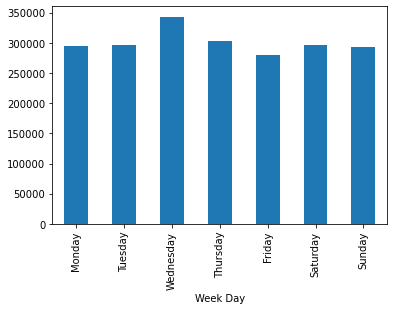

In [14]:
week_count.plot.bar()

from here we can see that the day with the highest steps is Wednesday while the day with lowest steps is Friday.

In [28]:
cat2 = ['January','February','March','April','May','June','July','August','September']
week_month_count = p1.groupby(['Month','Week Day'])['Steps (count)'].sum()
week_month_count

Month      Week Day 
April      Monday       35481.000000
           Tuesday      28970.822851
           Wednesday    31765.738255
           Thursday     25305.409558
           Friday       35761.000000
                            ...     
September  Wednesday        0.000000
           Thursday     14604.000000
           Friday        1574.000000
           Saturday         0.000000
           Sunday           0.000000
Name: Steps (count), Length: 70, dtype: float64

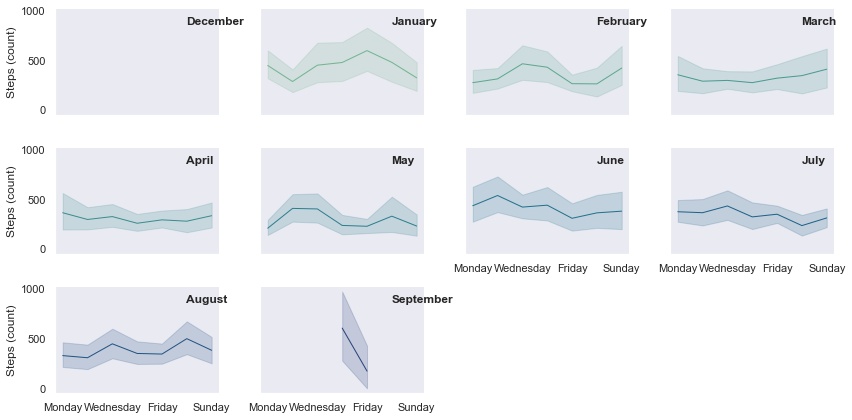

In [29]:
import seaborn as sns

sns.set_theme(style="dark")

# grid = sns.FacetGrid(p1, col="Month", palette="tab20c",
#                      col_wrap=5, height=5)

# Plot each year's time series in its own facet
g = sns.relplot(
    data=p1,
    x="Week Day", y="Steps (count)", col="Month", hue="Month",
    kind="line", palette="crest", linewidth=1, zorder=5,
    col_wrap=4, height=2, aspect=1.5, legend=False,
)

# Iterate over each subplot to customize further
for Month, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.8, .85, Month, transform=ax.transAxes, fontweight="bold")

#     Plot every year's time series in the background
#     sns.lineplot(
#         data=p1, x="Week Day", y="Steps (count)", units="Month",
#         estimator=None, color=".7", linewidth=1, ax=ax,
#     )

# Reduce the frequency of the x axis ticks
ax.set_xticks(ax.get_xticks()[::2])

# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("", "Steps (count)")
g.tight_layout()

# grid.map_dataframe(sns.barplot, "Week Day", "Steps (count)")

<AxesSubplot:xlabel='Week Day', ylabel='Steps (count)'>

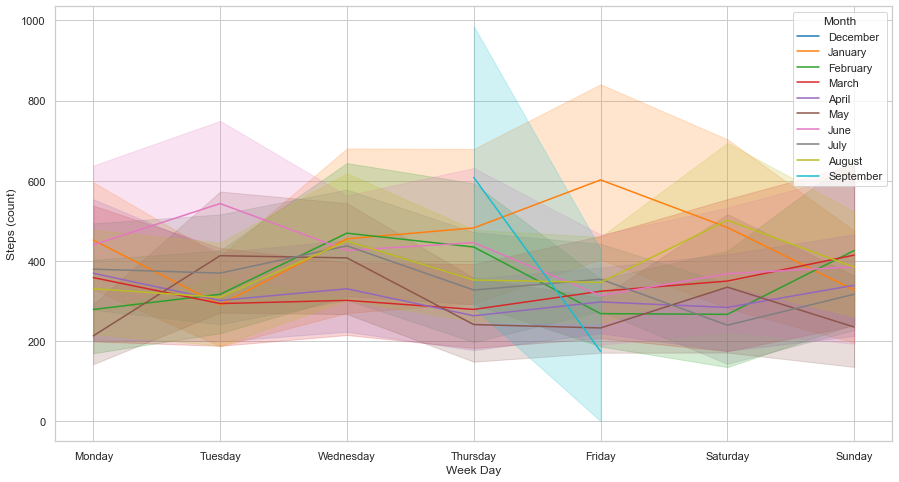

In [117]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_theme(style="whitegrid")

sns.lineplot(data=p1, x="Week Day", y="Steps (count)",
             hue="Month", palette="tab10"
             )

It could be seen that June had a typically higher step count than other months.

Next goal would be to produce some visualisations.


In [31]:
week_month_count['April'].median()

32953.0